In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
# importing data
df = pd.read_csv(r"C:\Users\ambik\OneDrive\FAO.csv",  encoding = "ISO-8859-1")


In [3]:
df

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


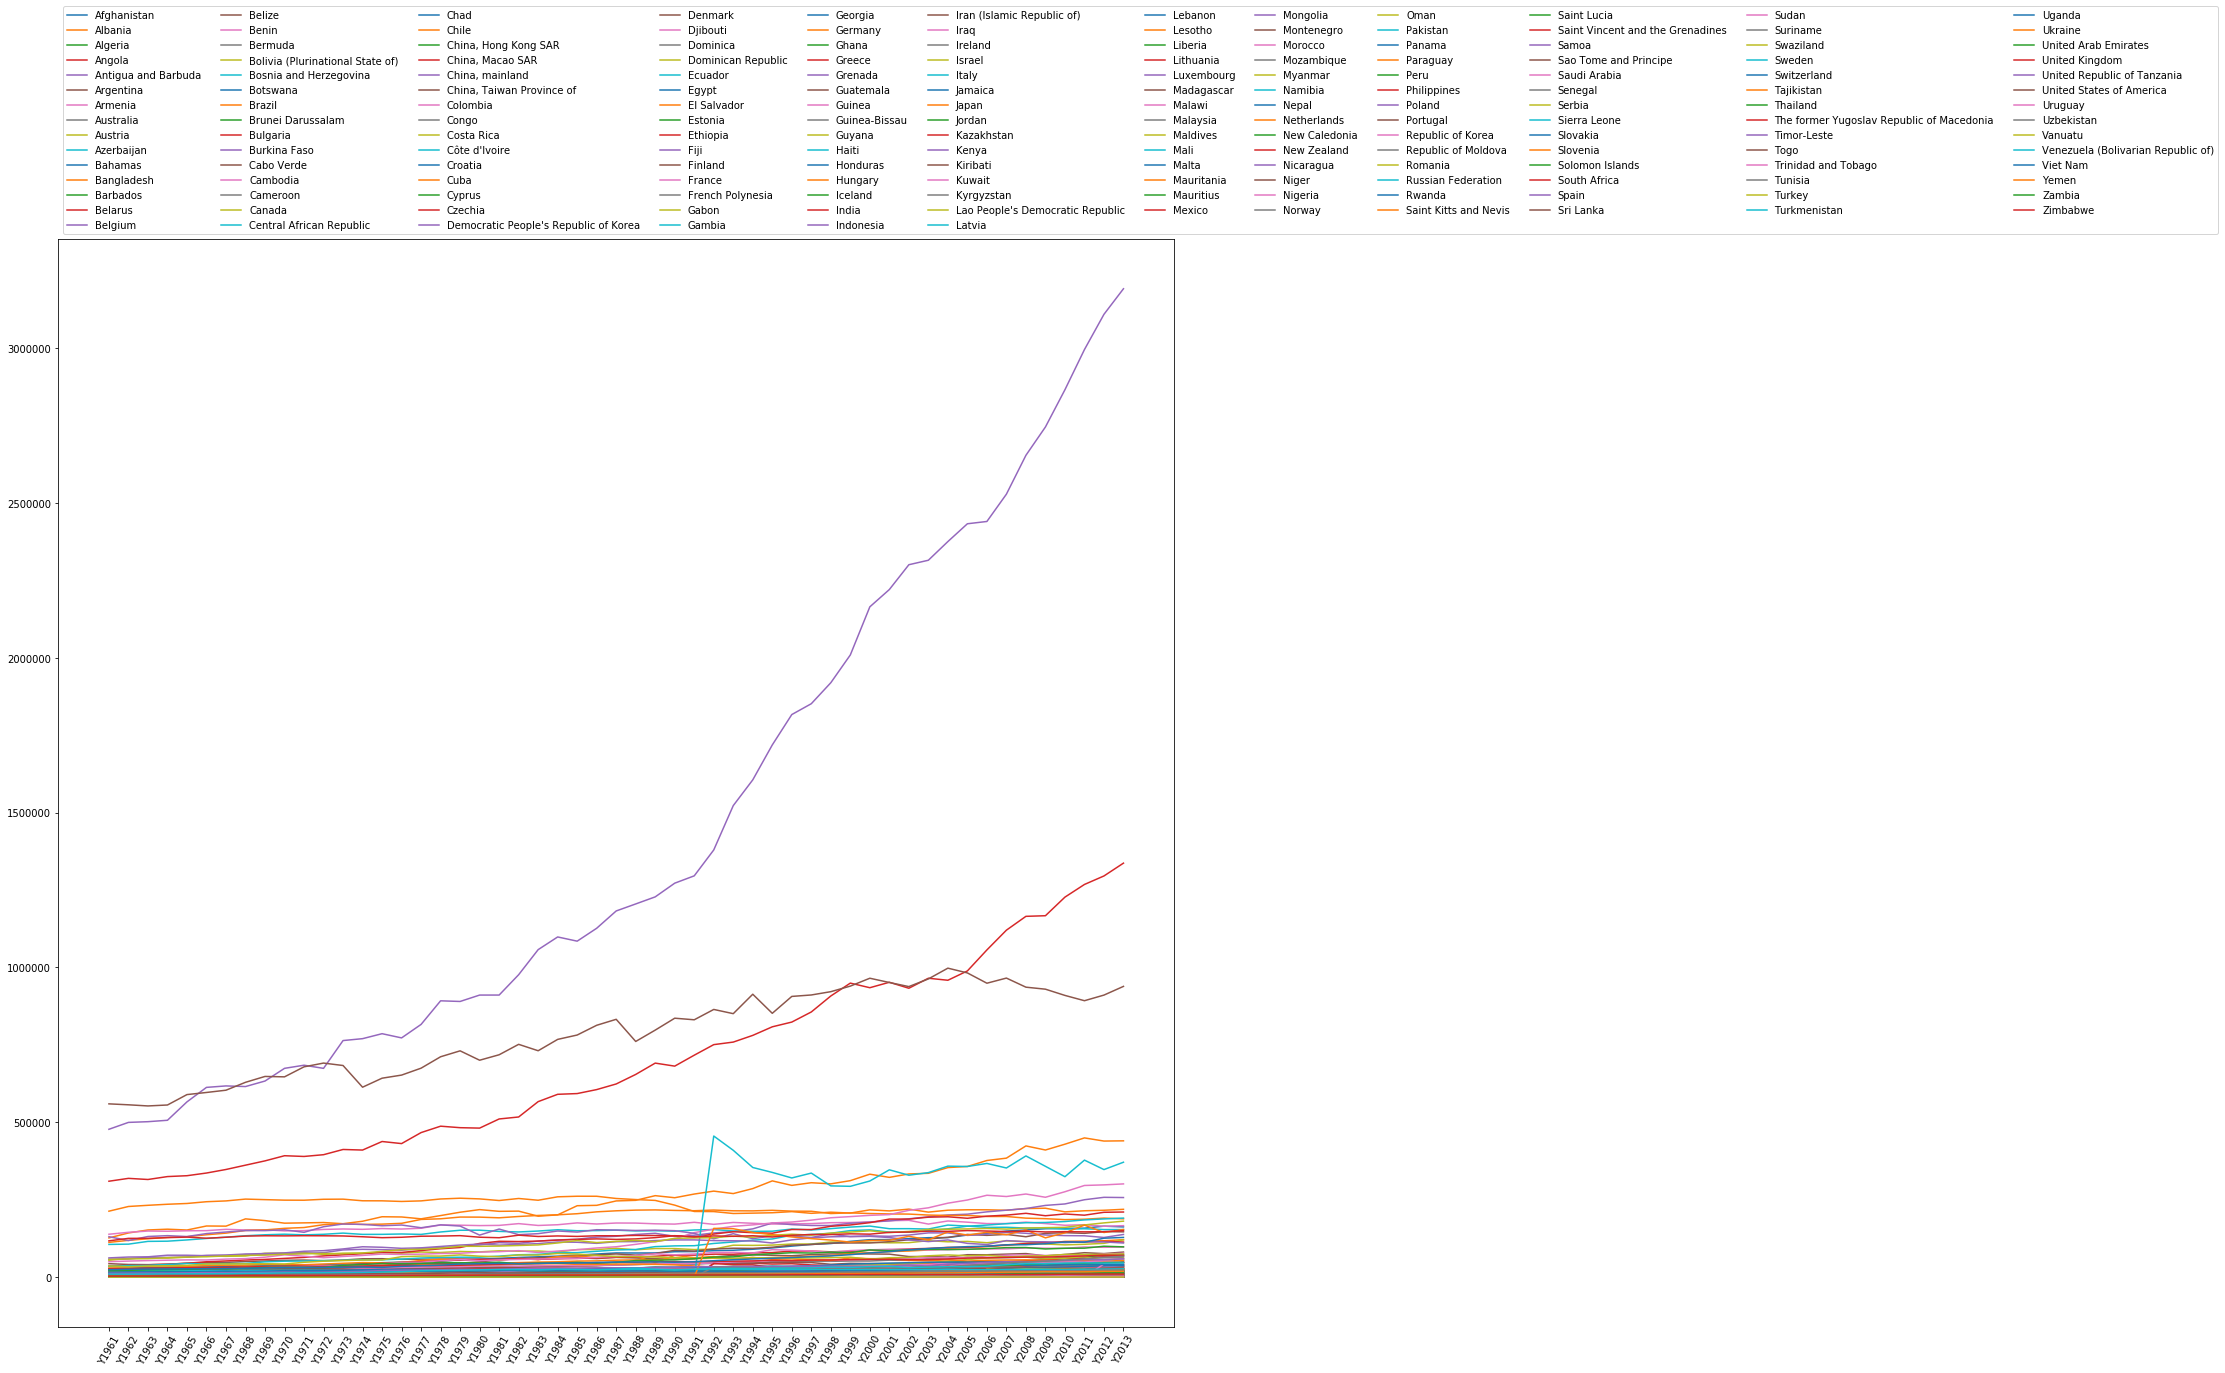

In [4]:
area_list = list(df['Area'].unique())
year_list = list(df.iloc[:,10:].columns)

plt.figure(figsize=(20,20))
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area'] == ar].sum())
    plt.plot(yearly_produce, label=ar)
plt.xticks(np.arange(53), tuple(year_list), rotation=60)
plt.legend(bbox_to_anchor = (0., 1, 1.5,  1.5), loc = 3, ncol = 12)
plt.savefig('p.png')
plt.show()

Clearly, China, India and US stand out here. So, these are the countries with most food and feed production.

Now, let's have a close look at their food and feed data

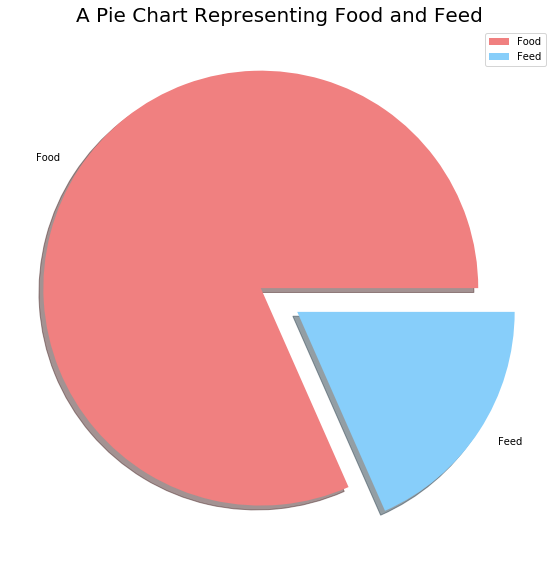

In [5]:
labels = ['Food', 'Feed']
size = df['Element'].value_counts()
colors = ['lightcoral', 'lightskyblue']
explode = [0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A Pie Chart Representing Food and Feed', fontsize = 20)
plt.legend()
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Food and feed plot for the largest producers(India, USA, China)')

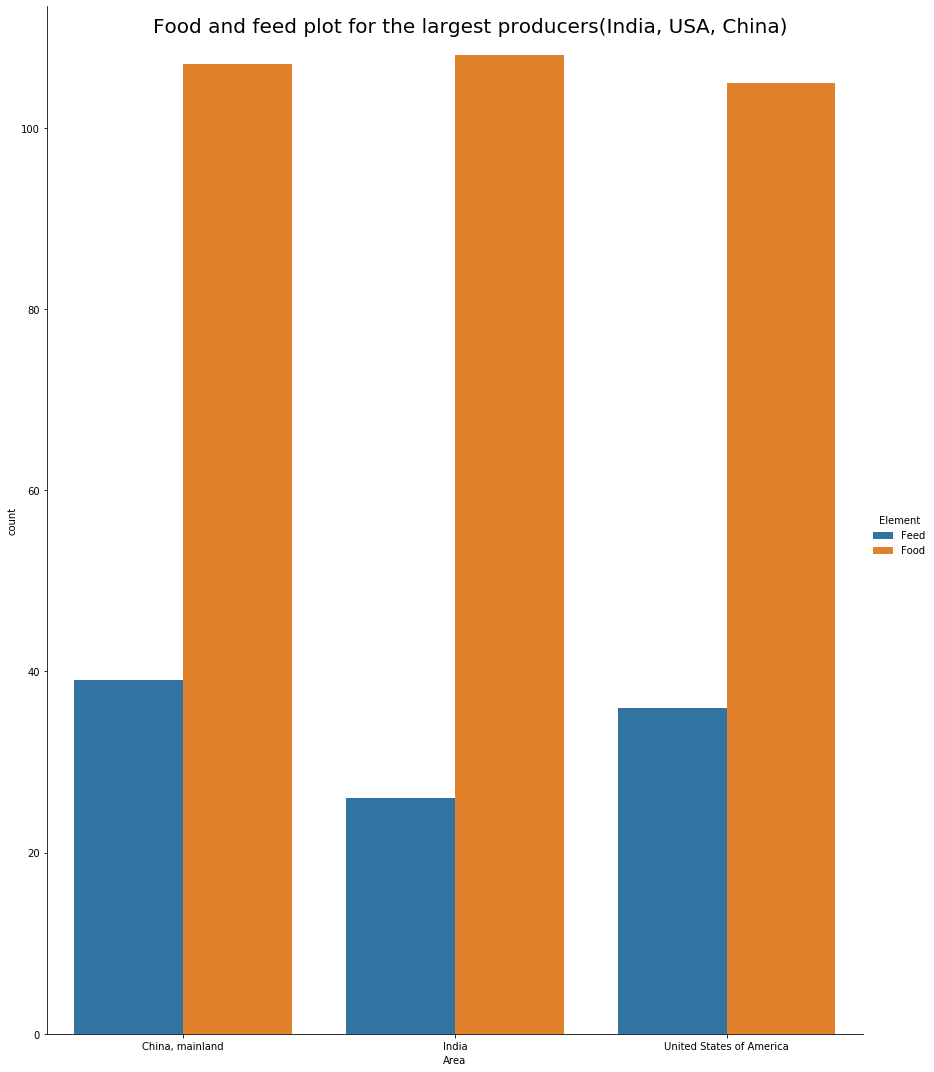

In [6]:
sns.factorplot("Area", data=df[(df['Area'] == "India") | (df['Area'] == "China, mainland") | (df['Area'] == "United States of America")], kind="count", hue="Element", size=15, aspect=.8)
plt.suptitle('Food and feed plot for the largest producers(India, USA, China)', fontsize = 20)

Though, there is a huge difference between feed and food production, these countries' total production and their ranks depend on feed production.

In [7]:
new_df_dict = {}
for ar in area_list:
    yearly_produce = []
    for yr in year_list:
        yearly_produce.append(df[yr][df['Area']==ar].sum())
    new_df_dict[ar] = yearly_produce
new_df = pd.DataFrame(new_df_dict)

new_df.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,9481.0,1706.0,7488.0,4834.0,92.0,43402.0,0.0,25795.0,22542.0,0.0,...,12367.0,559347.0,4631.0,0.0,97.0,9523.0,23856.0,2982.0,2976.0,3260.0
1,9414.0,1749.0,7235.0,4775.0,94.0,40784.0,0.0,27618.0,22627.0,0.0,...,12810.0,556319.0,4448.0,0.0,101.0,9369.0,25220.0,3038.0,3057.0,3503.0
2,9194.0,1767.0,6861.0,5240.0,105.0,40219.0,0.0,28902.0,23637.0,0.0,...,13109.0,552630.0,4682.0,0.0,103.0,9788.0,26053.0,3147.0,3069.0,3479.0
3,10170.0,1889.0,7255.0,5286.0,95.0,41638.0,0.0,29107.0,24099.0,0.0,...,12965.0,555677.0,4723.0,0.0,102.0,10539.0,26377.0,3224.0,3121.0,3738.0
4,10473.0,1884.0,7509.0,5527.0,84.0,44936.0,0.0,28961.0,22664.0,0.0,...,13742.0,589288.0,4581.0,0.0,107.0,10641.0,26961.0,3328.0,3236.0,3940.0


In [8]:
new_df = pd.DataFrame.transpose(new_df)
new_df.columns = year_list

new_df.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0


## Let us add a new column which indicates mean produce of each state over the given years. And another column which ranks countries on the basis of mean produce.

In [9]:
mean_produce = []
for i in range(174):
    mean_produce.append(new_df.iloc[i,:].values.mean())
new_df['Mean_Produce'] = mean_produce

new_df['Rank'] = new_df['Mean_Produce'].rank(ascending=False)

new_df.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,13003.056604,69.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4475.509434,104.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0,28879.490566,38.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0,13321.056604,68.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0,83.886792,172.0


## Now let's see top 6 countries' growth from 2003 to 2013

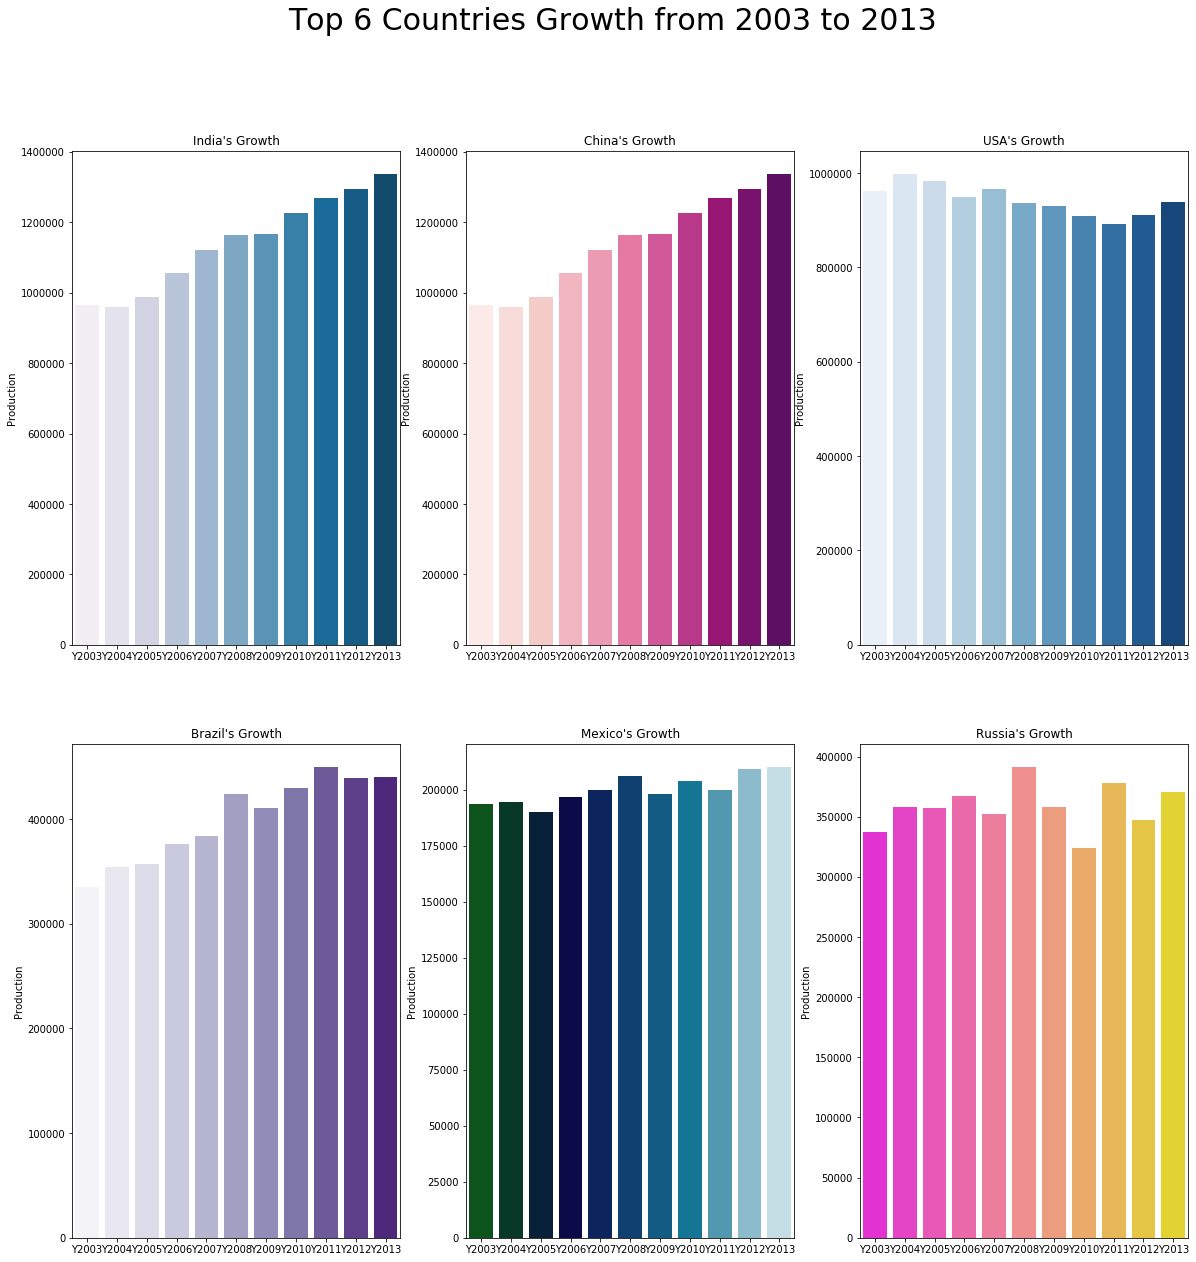

In [10]:
plt.rcParams['figure.figsize'] = (20, 20)


# looking at India's Growth
india_production = pd.DataFrame(df[df['Area'] == 'India'].loc[:, "Y2003": "Y2013"].agg("sum", axis = 0))

india_production.columns = ['Production']
plt.subplot(231)
sns.barplot(x = india_production.index, y = india_production.Production, data = india_production, palette = 'PuBu')
plt.gca().set_title("India's Growth")

# looking at china's growth
china_production = pd.DataFrame(df[df['Area'] == 'China, mainland'].loc[:, "Y2003":"Y2013"].agg("sum", axis = 0))

china_production.columns = ['Production']
plt.subplot(232)
sns.barplot(x = china_production.index, y = india_production.Production, data = china_production, palette = 'RdPu')
plt.gca().set_title("China's Growth")

#looking at usa's growth
usa_production = pd.DataFrame(df[df['Area'] == 'United States of America'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

usa_production.columns = ['Production']
plt.subplot(233)
sns.barplot(x = usa_production.index, y = usa_production.Production, data= usa_production, palette = 'Blues')
plt.gca().set_title("USA's Growth")

#looking at brazil's growth
brazil_production = pd.DataFrame(df[df['Area'] == 'Brazil'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

brazil_production.columns = ['Production']
plt.subplot(234)
sns.barplot(x = brazil_production.index, y = brazil_production.Production, data = brazil_production, palette = 'Purples')
plt.gca().set_title("Brazil's Growth")


#looking at mexico's growth
mexico_production = pd.DataFrame(df[df['Area'] == 'Mexico'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

mexico_production.columns = ['Production']
plt.subplot(235)
sns.barplot(x = mexico_production.index, y = mexico_production.Production, data = mexico_production, palette = 'ocean')
plt.gca().set_title("Mexico's Growth")

#looking at russia's growth
russia_production = pd.DataFrame(df[df['Area'] == 'Russian Federation'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

russia_production.columns = ['Production']
plt.subplot(236)
sns.barplot(x = russia_production.index, y = russia_production.Production, data= russia_production, palette = 'spring')
plt.gca().set_title("Russia's Growth")

plt.suptitle('Top 6 Countries Growth from 2003 to 2013', fontsize = 30)
plt.show()

## Let's create a new dataframe with Items and their total production each year from 1961 to 2013

In [11]:
item_list = list(df['Item'].unique())

item_df = pd.DataFrame()
item_df['Item_Name'] = item_list

for yr in year_list:
    item_produce = []
    for it in item_list:
        item_produce.append(df[yr][df['Item']==it].sum())
    item_df[yr] = item_produce

In [12]:
item_df.head()

,Item_Name,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Wheat and products,138829.0,144643.0,147325.0,156273.0,168822.0,169832.0,171469.0,179530.0,189658.0,...,527394.0,532263.0,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597,587492
1,Rice (Milled Equivalent),122700.0,131842.0,139507.0,148304.0,150056.0,155583.0,158587.0,164614.0,167922.0,...,361107.0,366025.0,372629.0,378698.0,389708.0,394221.0,398559.0,404152.0,406787,410880
2,Barley and products,46180.0,48915.0,51642.0,54184.0,54945.0,55463.0,56424.0,60455.0,65501.0,...,102055.0,97185.0,100981.0,93310.0,98209.0,99135.0,92563.0,92570.0,88766,99452
3,Maize and products,168039.0,168305.0,172905.0,175468.0,190304.0,200860.0,213050.0,215613.0,221953.0,...,545024.0,549036.0,543280.0,573892.0,592231.0,557940.0,584337.0,603297.0,608730,671300
4,Millet and products,19075.0,19019.0,19740.0,20353.0,18377.0,20860.0,22997.0,21785.0,23966.0,...,25789.0,25496.0,25997.0,26750.0,26373.0,24575.0,27039.0,25740.0,26105,26346


## Total amount of items produced from 1961 to 2013 and providing a rank to the items to know the most produced item

In [13]:
sum_col = []
for i in range(115):
    sum_col.append(item_df.iloc[i,1:].values.sum())
item_df['Sum'] = sum_col
item_df['Production_Rank'] = item_df['Sum'].rank(ascending=False)

item_df.head()

,Item_Name,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Sum,Production_Rank
0,Wheat and products,138829.0,144643.0,147325.0,156273.0,168822.0,169832.0,171469.0,179530.0,189658.0,...,537279.0,529271.0,562239.0,557245.0,549926.0,578179.0,576597,587492,19194671.0,6.0
1,Rice (Milled Equivalent),122700.0,131842.0,139507.0,148304.0,150056.0,155583.0,158587.0,164614.0,167922.0,...,372629.0,378698.0,389708.0,394221.0,398559.0,404152.0,406787,410880,14475448.0,8.0
2,Barley and products,46180.0,48915.0,51642.0,54184.0,54945.0,55463.0,56424.0,60455.0,65501.0,...,100981.0,93310.0,98209.0,99135.0,92563.0,92570.0,88766,99452,4442742.0,20.0
3,Maize and products,168039.0,168305.0,172905.0,175468.0,190304.0,200860.0,213050.0,215613.0,221953.0,...,543280.0,573892.0,592231.0,557940.0,584337.0,603297.0,608730,671300,19960640.0,5.0
4,Millet and products,19075.0,19019.0,19740.0,20353.0,18377.0,20860.0,22997.0,21785.0,23966.0,...,25997.0,26750.0,26373.0,24575.0,27039.0,25740.0,26105,26346,1225400.0,38.0


In [14]:
item_df['Item_Name'][item_df['Production_Rank'] < 11.0].sort_values() #to find most produced item

56    Cereals - Excluding Beer
65     Fruits - Excluding Wine
3           Maize and products
53     Milk - Excluding Butter
6        Potatoes and products
1     Rice (Milled Equivalent)
57               Starchy Roots
64                  Vegetables
27           Vegetables, Other
0           Wheat and products
Name: Item_Name, dtype: object

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


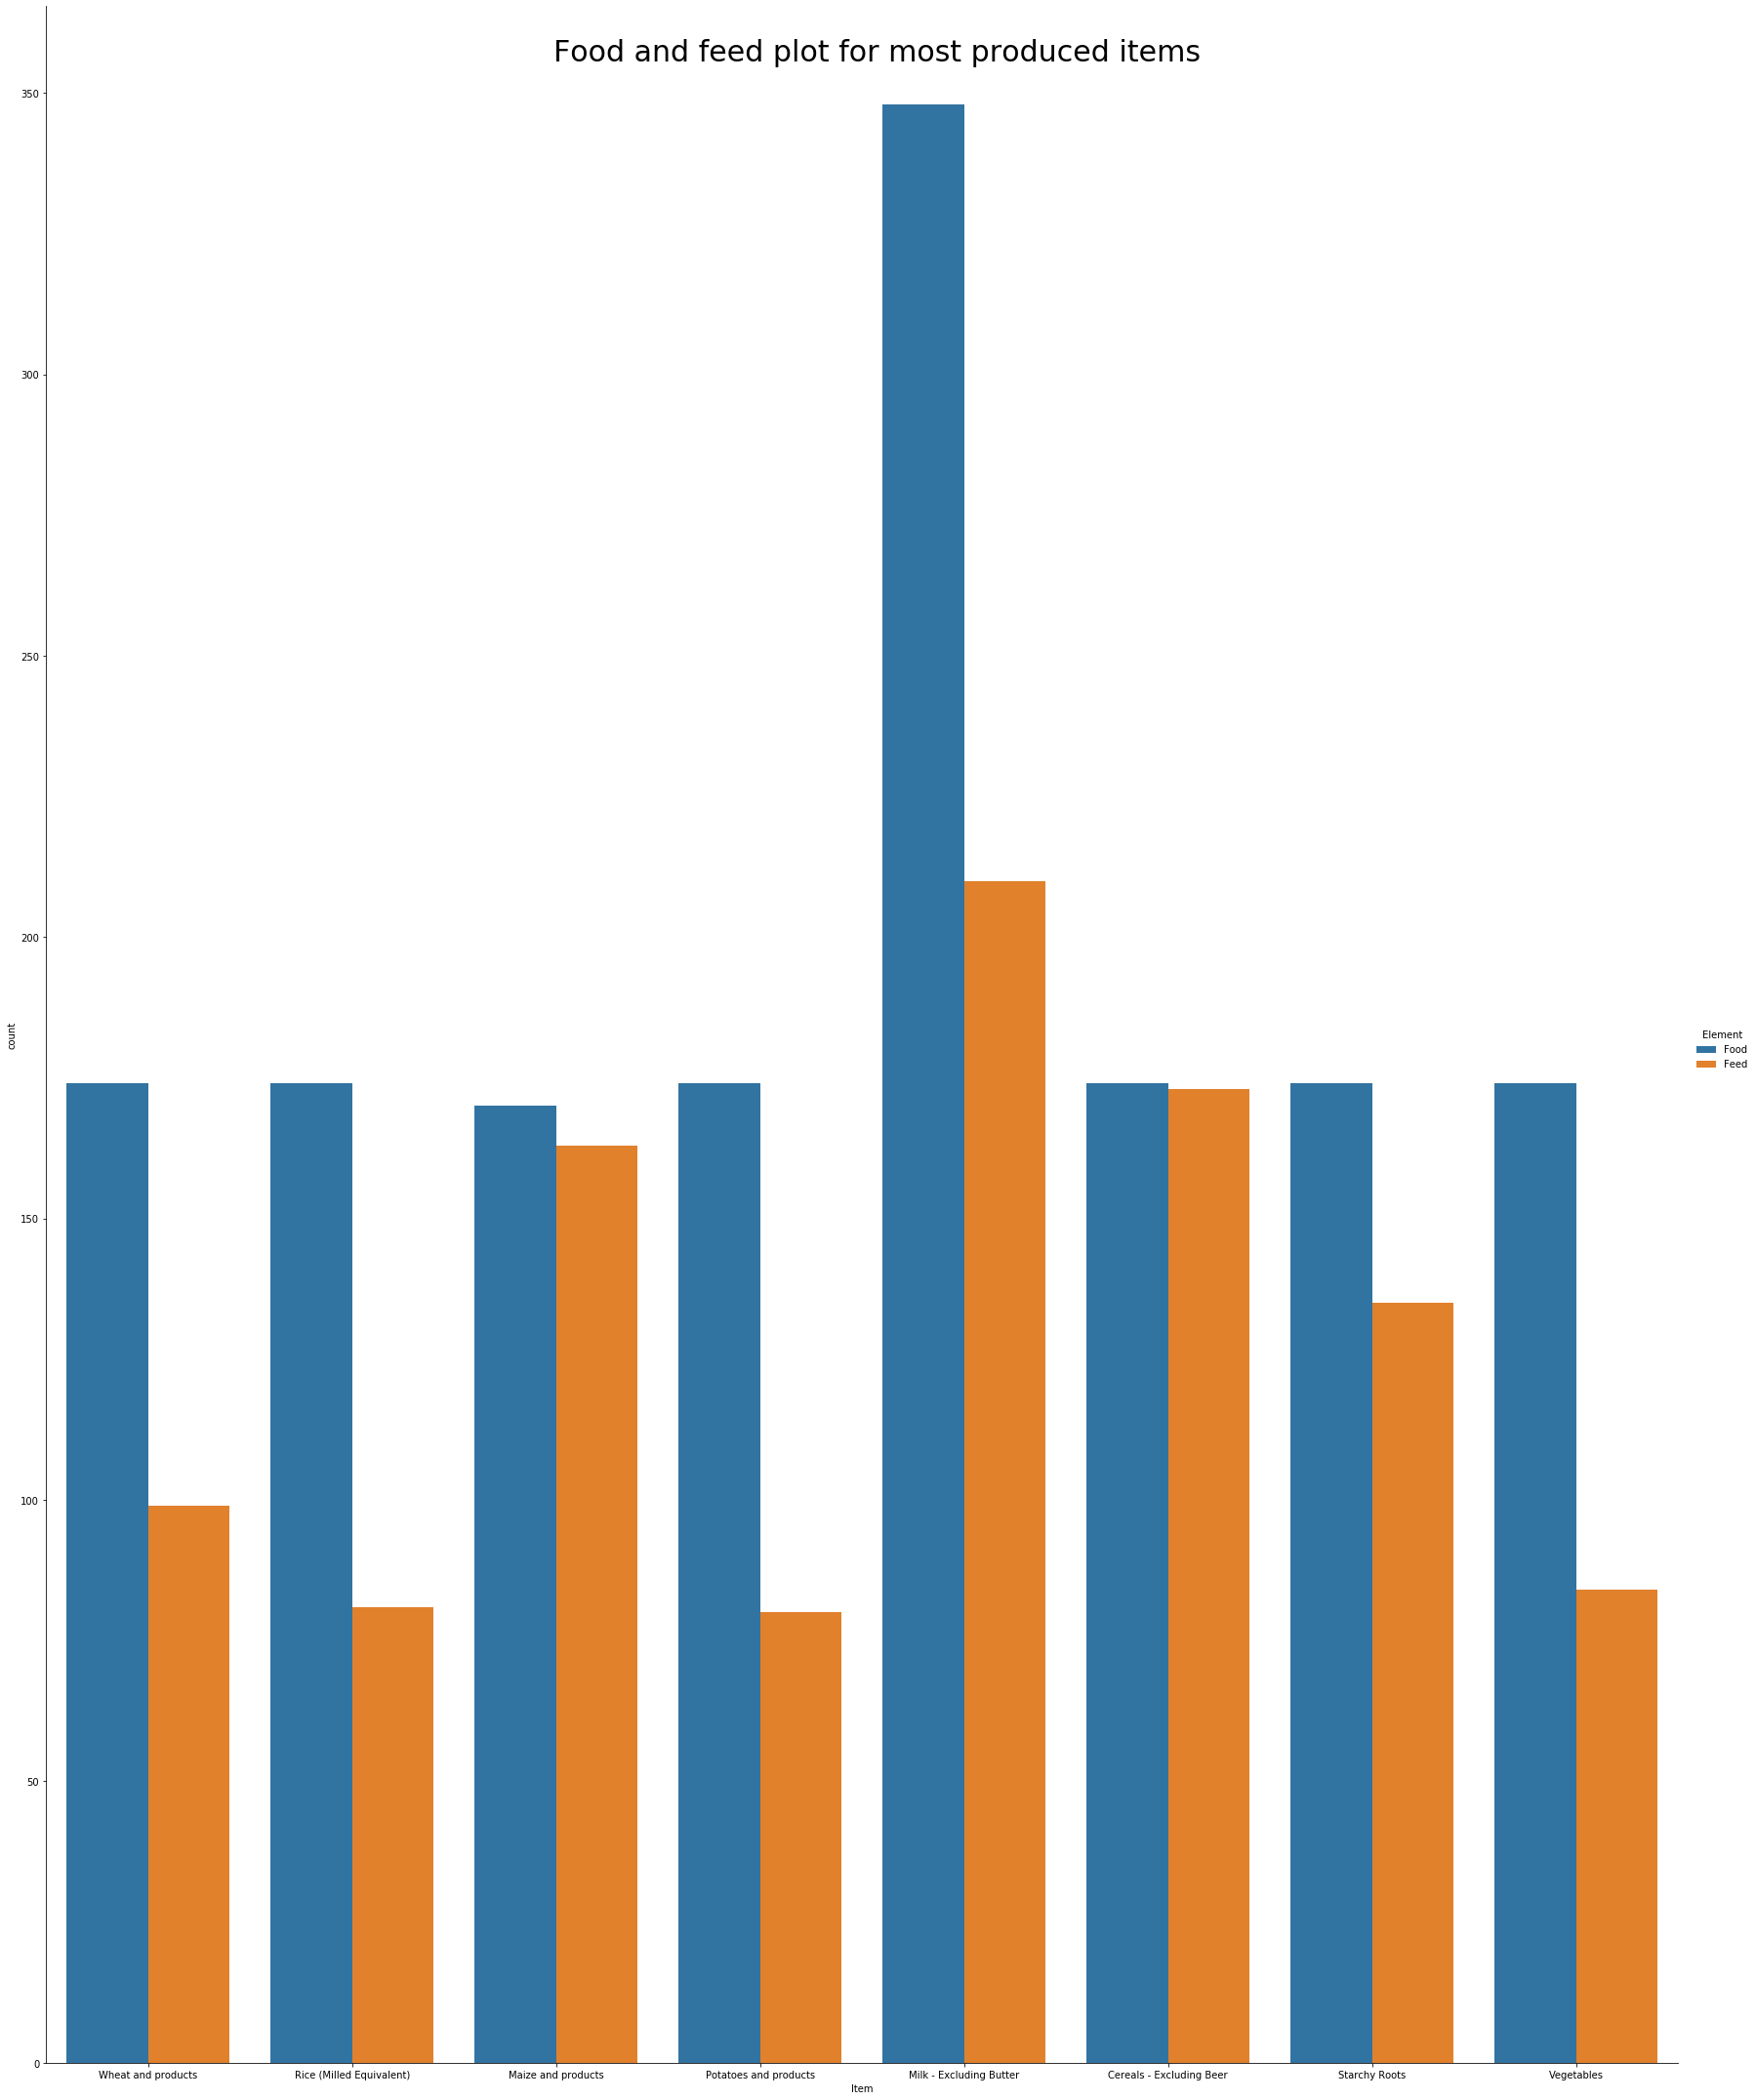

In [15]:
sns.factorplot("Item", data=df[(df['Item']=='Cereals - Excluding Beer') | (df['Item']=='Fruits') | (df['Item']=='Maize and products') | (df['Item']=='Milk - Excluding Butter') | (df['Item']=='Potatoes and products') | (df['Item']=='Rice (Milled Equivalent)') | (df['Item']=='Starchy Roots') | (df['Item']=='Vegetables') | (df['Item']==' Vegetables, Other') | (df['Item']=='Wheat and products')], kind="count", hue="Element", size=30, aspect=.8)
plt.suptitle('Food and feed plot for most produced items ', fontsize = 30)
plt.show() #Food and feed plot for most produced items

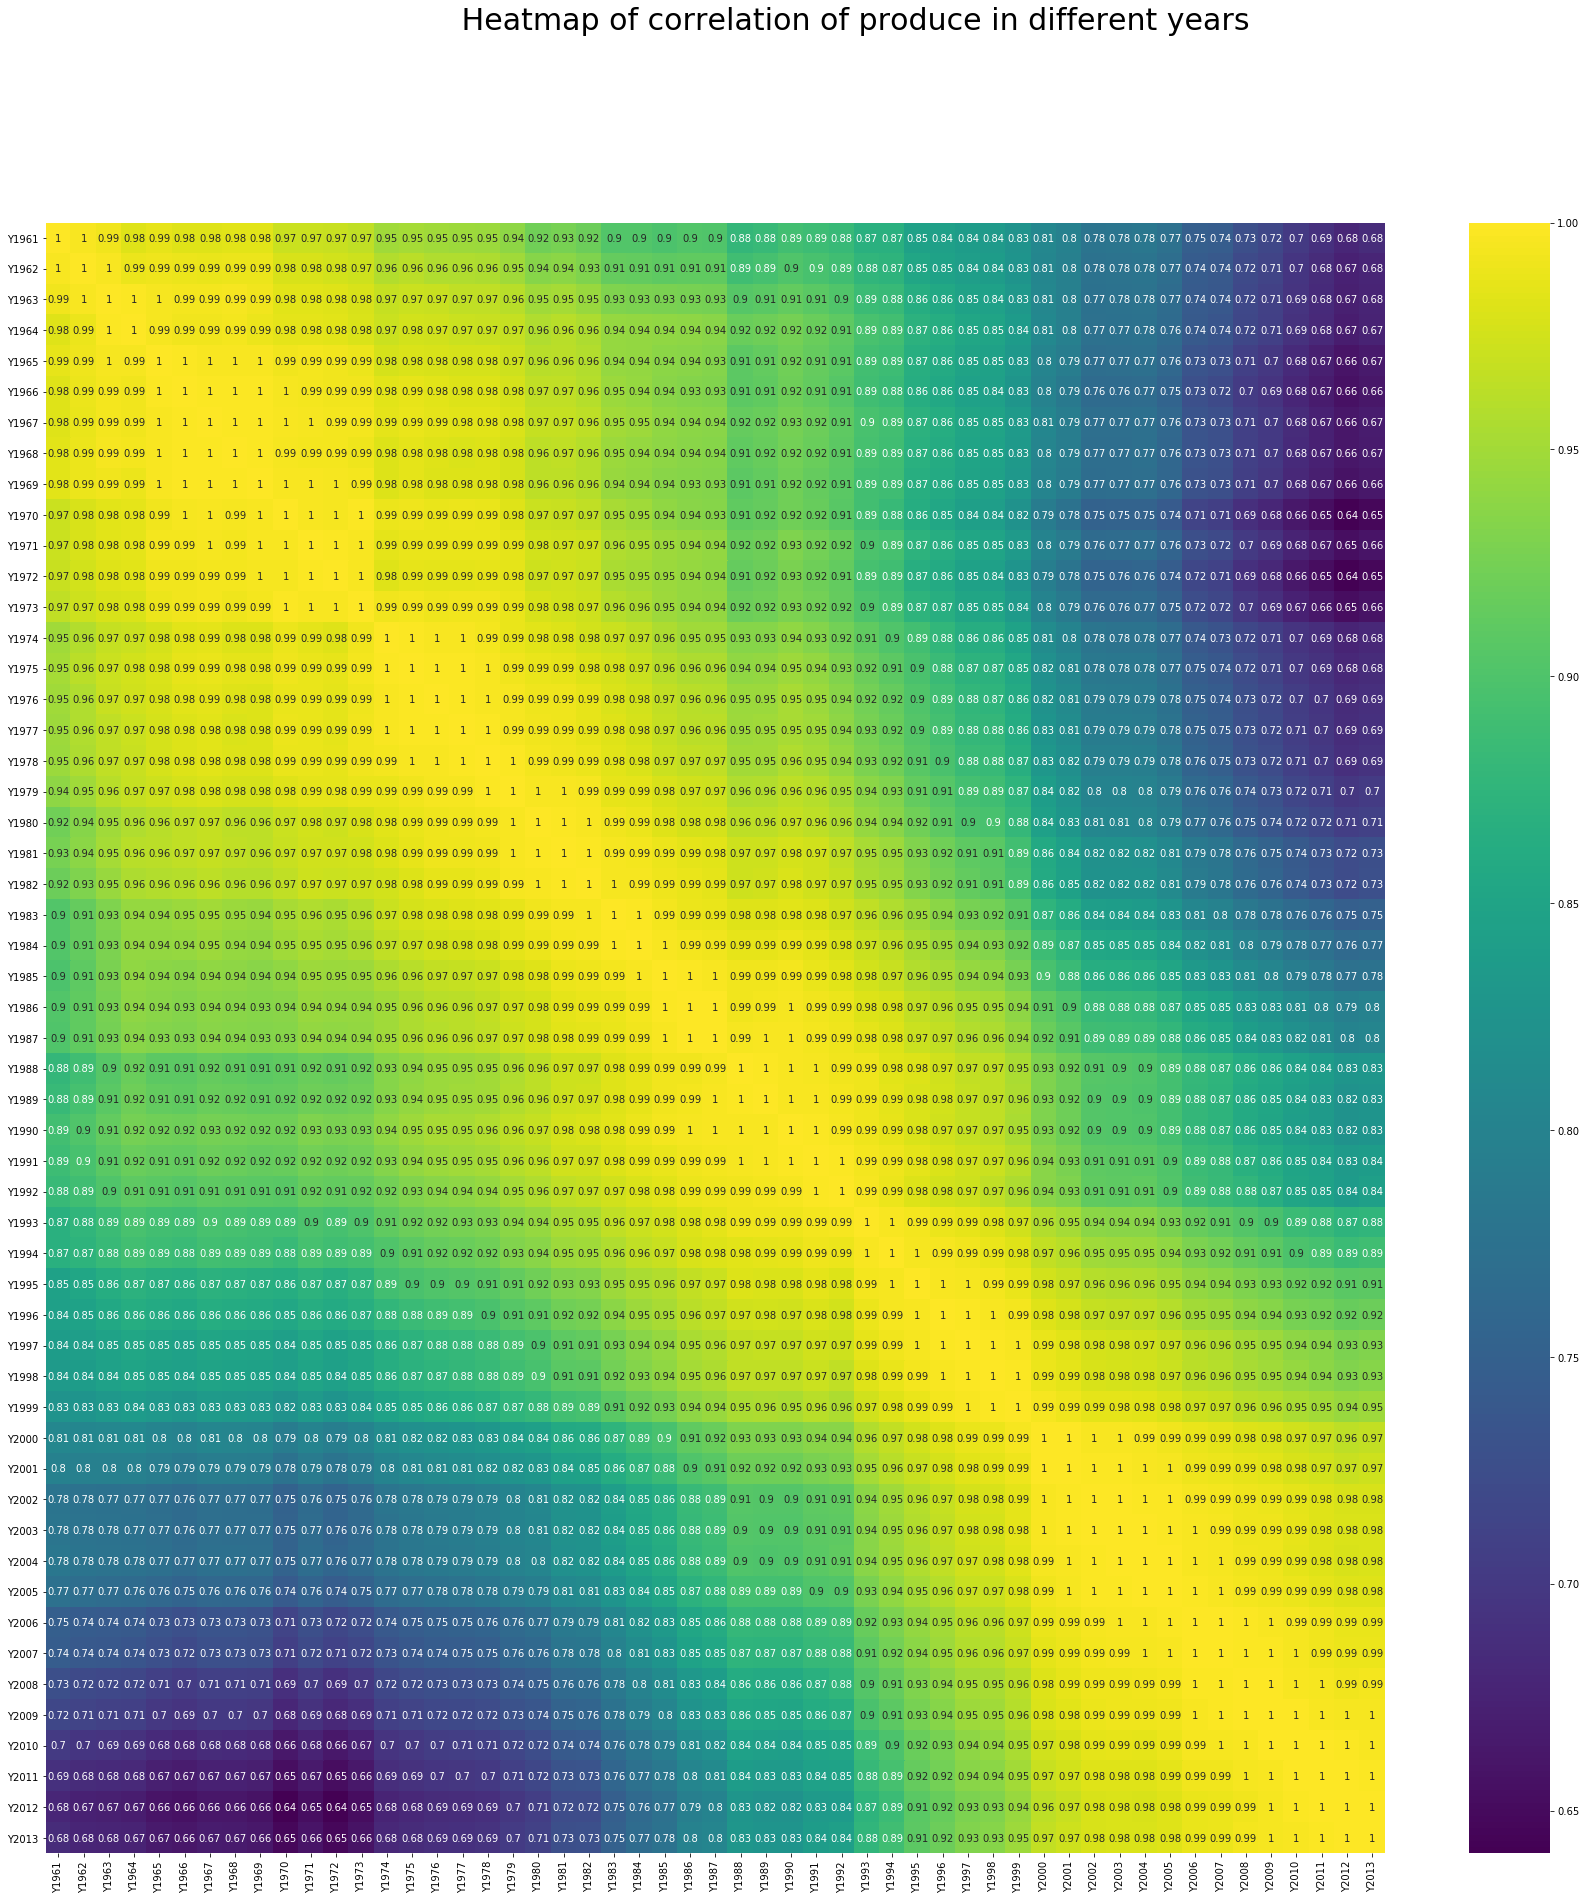

In [16]:
year_df = df.iloc[:,10:]
fig, ax = plt.subplots(figsize=(30,30))
plt.suptitle(' Heatmap of correlation of produce in different years ', fontsize = 30)
sns.heatmap(year_df.corr(), ax=ax,cmap = 'viridis',annot=True)


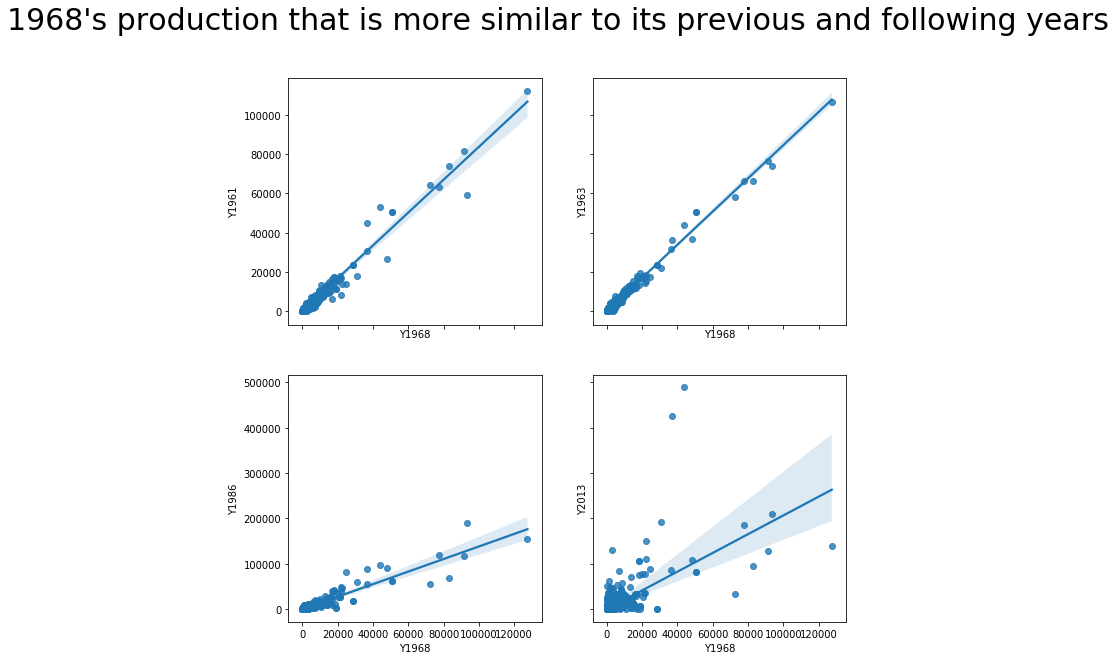

In [17]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,10))
plt.suptitle("1968's production that is more similar to its previous and following years", fontsize = 30)
ax1.set(xlabel='Y1968', ylabel='Y1961')
ax2.set(xlabel='Y1968', ylabel='Y1963')
ax3.set(xlabel='Y1968', ylabel='Y1986')
ax4.set(xlabel='Y1968', ylabel='Y2013')
sns.jointplot(x="Y1968", y="Y1961", data=df, kind="reg", ax=ax1)
sns.jointplot(x="Y1968", y="Y1963", data=df, kind="reg", ax=ax2)
sns.jointplot(x="Y1968", y="Y1986", data=df, kind="reg", ax=ax3)
sns.jointplot(x="Y1968", y="Y2013", data=df, kind="reg", ax=ax4)
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)

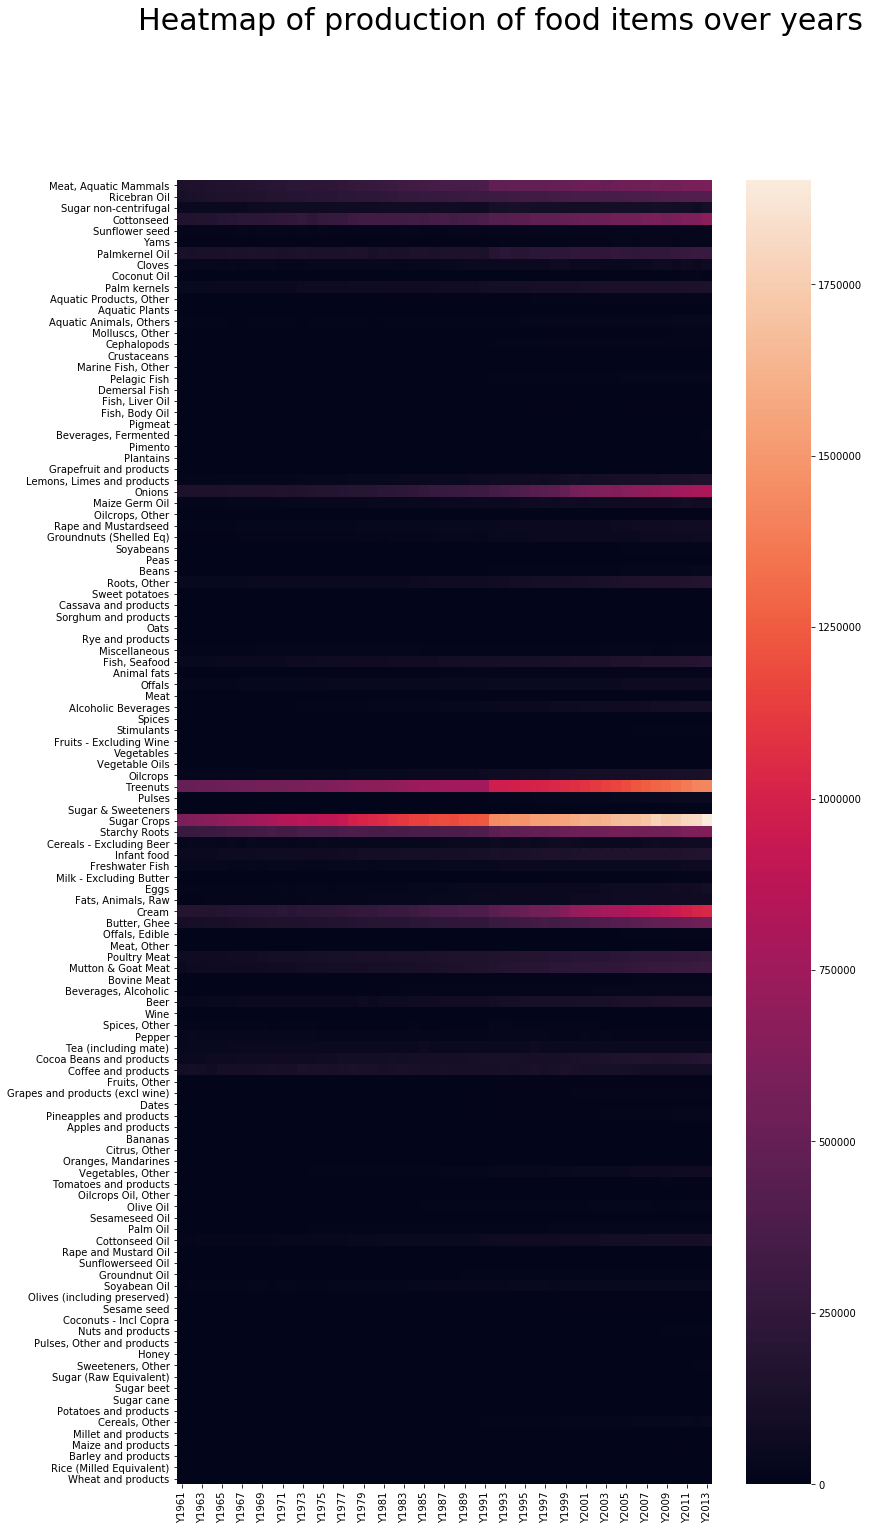

In [18]:
new_item_df = item_df.drop(["Item_Name","Sum","Production_Rank"], axis = 1)
fig, ax = plt.subplots(figsize=(12,24))
plt.suptitle('Heatmap of production of food items over years', fontsize = 30)
sns.heatmap(new_item_df,ax=ax)
ax.set_yticklabels(item_df.Item_Name.values[::-1])
plt.show()

There is considerable growth in production of Palmkernel oil, Meat/Aquatic animals, ricebran oil, cottonseed, seafood, offals, roots, poultry meat, mutton, bear, cocoa, coffee and soyabean oil. There has been exceptional growth in production of onions, cream, sugar crops, treenuts, butter/ghee and to some extent starchy roots.

## Perform K-means clustering 

In [19]:
new_df.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean_Produce,Rank
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0,13003.056604,69.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0,4475.509434,104.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0,28879.490566,38.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0,13321.056604,68.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0,83.886792,172.0


In [20]:
y=new_df.iloc[:,:-2].values
y=y.astype(int)
type(y)

numpy.ndarray

##  Elbow method to select number of clusters

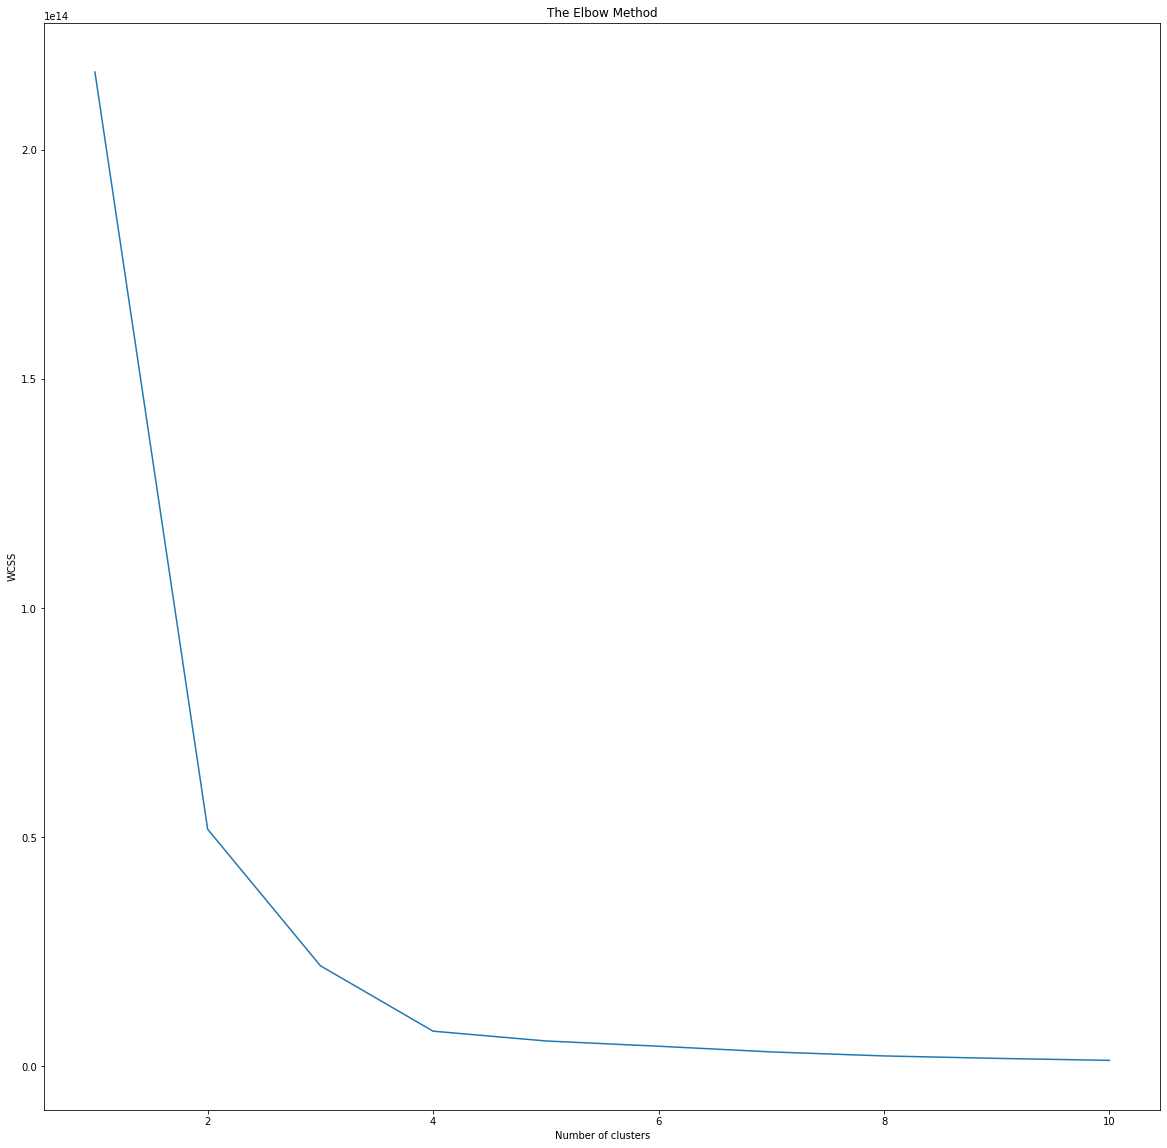

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.rcParams['figure.figsize'] = (5, 5)
plt.show()

As the elbow corner coincides with x=2, we will have to form 2clusters.

In [22]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(y)


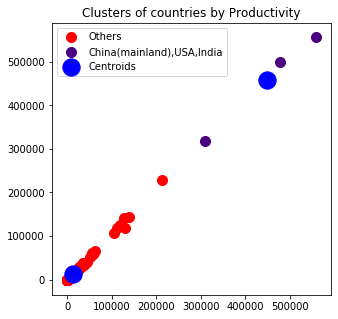

In [23]:
plt.scatter(y[y_kmeans == 0, 0], y[y_kmeans == 0,1],s=100,c='red',label='Others')
plt.scatter(y[y_kmeans == 1, 0], y[y_kmeans == 1,1],s=100,c='indigo',label='China(mainland),USA,India')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='blue',label='Centroids')
plt.title('Clusters of countries by Productivity')
plt.legend()
plt.show()